In [1]:
#the dataset gives us electronic sales data at amazon.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset=pd.read_csv('electronics.csv')
dataset.head(10)

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
5,0,5,2.0,1999-07-12,Female,Portable Audio & Video,NaN,1999,NaN,0
6,0,6,5.0,1999-07-13,Female,Portable Audio & Video,NaN,1999,NaN,0
7,0,7,2.0,1999-07-13,Female,Portable Audio & Video,NaN,1999,NaN,0
8,0,8,4.0,1999-07-16,Female,Portable Audio & Video,NaN,1999,NaN,0
9,0,9,5.0,1999-08-20,Female,Portable Audio & Video,NaN,1999,NaN,0


In [2]:
#list of lat five rows
dataset.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0
1292953,9478,1157632,1.0,2018-10-01,Female,Headphones,Etre Jeune,2017,Female,0


In [3]:
#checking the rows and columns of the data set
dataset.shape

(1292954, 10)

In [4]:
#checking the data type of given data frame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [5]:
#As we can see the column timestamp is of int6 data type,but it is actually a timestamp so we need o convert it to a timestamp
from datetime import datetime
pd.to_datetime(dataset['timestamp'])

0         1999-06-13
1         1999-06-14
2         1999-06-17
3         1999-07-01
4         1999-07-06
             ...    
1292949   2018-09-26
1292950   2018-09-26
1292951   2018-09-26
1292952   2018-09-29
1292953   2018-10-01
Name: timestamp, Length: 1292954, dtype: datetime64[ns]

In [6]:
#we ca also see that the column Product Id is of data type,but it is actuall a string.
#we ca convert it to a sting using the following code:
dataset['brand']=dataset['brand'].astype(str)

In [7]:
#we can also see that the column category is of object data tpe,but it is actually a string.
#we can convert it to a float using following code:
dataset["rating"]=dataset["rating"].astype(float)

In [8]:
#we can also see User ID isit64 datatype,so need to convert in string data type
dataset['user_id']=dataset['user_id'].astype(str)

In [9]:
#we can also see that the colum Product ID is of object data type ,so need  to convert into string data type
dataset['item_id']=dataset['item_id'].astype(str)


In [10]:
#statstical summary of dataset.
dataset.describe()

,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.051482e+00,2.012938e+03,1.747587e-01
std,1.379732e+00,2.643513e+00,5.506810e-01
min,1.000000e+00,1.999000e+03,0.000000e+00
25%,4.000000e+00,2.012000e+03,0.000000e+00
50%,5.000000e+00,2.014000e+03,0.000000e+00
75%,5.000000e+00,2.015000e+03,0.000000e+00
max,5.000000e+00,2.018000e+03,2.000000e+00


In [11]:
#unique sets and items in datset.
dataset.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              51
year               20
user_attr           2
split               3
dtype: int64

In [12]:
# Columns present in the dataset
dataset.columns

Index(['item_id', 'user_id', 'rating', 'timestamp', 'model_attr', 'category',
       'brand', 'year', 'user_attr', 'split'],
      dtype='object')

In [13]:
#Checking if there is duplicate value
dataset.duplicated().sum()

0

In [14]:
#checking missing values
dataset.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand               0
year                0
user_attr     1118830
split               0
dtype: int64

In [15]:
dataset['rating'].value_counts()

rating
5.0    755755
4.0    214166
1.0    143755
3.0    100630
2.0     78648
Name: count, dtype: int64

In [16]:
#checking the best year of sales
dataset['year']=pd.DatetimeIndex(dataset['timestamp']).year
dataset['year'].value_counts()

year
2015    320887
2016    302619
2017    192477
2014    180676
2013     99855
2018     80229
2012     38389
2011     23894
2010     16888
2009     12804
2008      9428
2007      6798
2006      2614
2005      2170
2004      1275
2003       833
2002       481
2001       403
2000       187
1999        47
Name: count, dtype: int64

2015 is te best year of sales

In [18]:
# the best month of sales
dataset['month']=pd.DatetimeIndex(dataset['timestamp']).month

dataset['month'].value_counts()

month
1     140773
12    124597
3     116464
2     110546
8     109835
7     107612
4      99136
5      98207
9      97368
11     97015
6      96317
10     95084
Name: count, dtype: int64

January was the best month of sale

In [20]:
#drop all null values
dataset.dropna(inplace=True)
dataset.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
month         0
dtype: int64

<Axes: xlabel='rating', ylabel='count'>

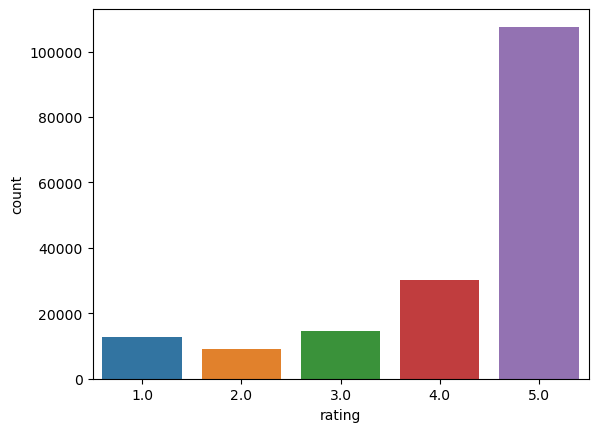

In [27]:
#the distribution of ratings

sns.countplot(x='rating',data=dataset)

<Axes: xlabel='year', ylabel='count'>

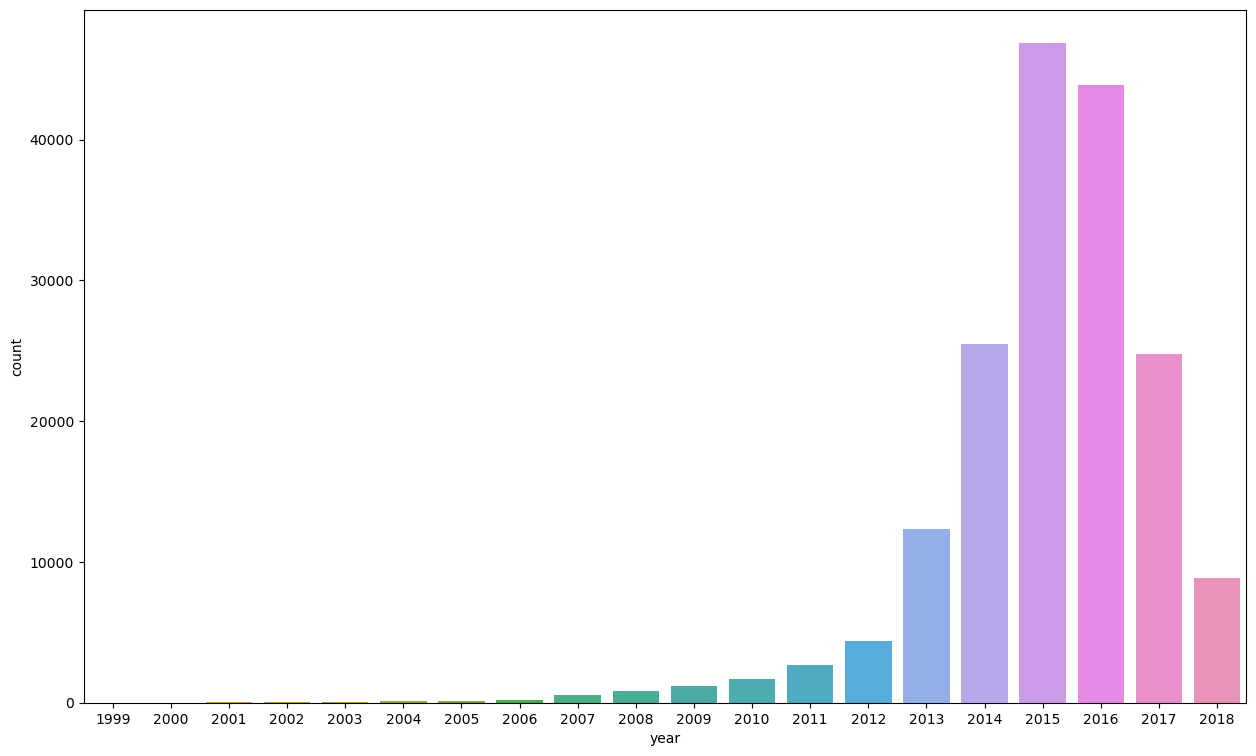

In [30]:
#the distribution of sales by year
plt.figure(figsize=(15, 9))
sns.countplot(x='year',data=dataset)

<Axes: xlabel='brand', ylabel='count'>

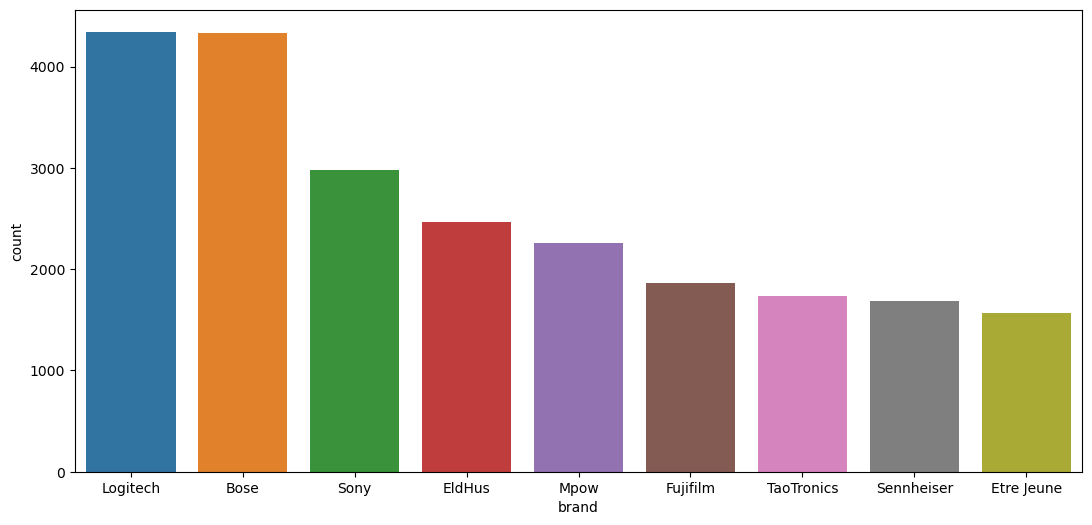

In [38]:
#brand with most sales 
plt.figure(figsize=(13, 6))
sns.countplot(x='brand',data=dataset,order=dataset['brand'].value_counts().iloc[1:10].index)

<Axes: xlabel='brand', ylabel='count'>

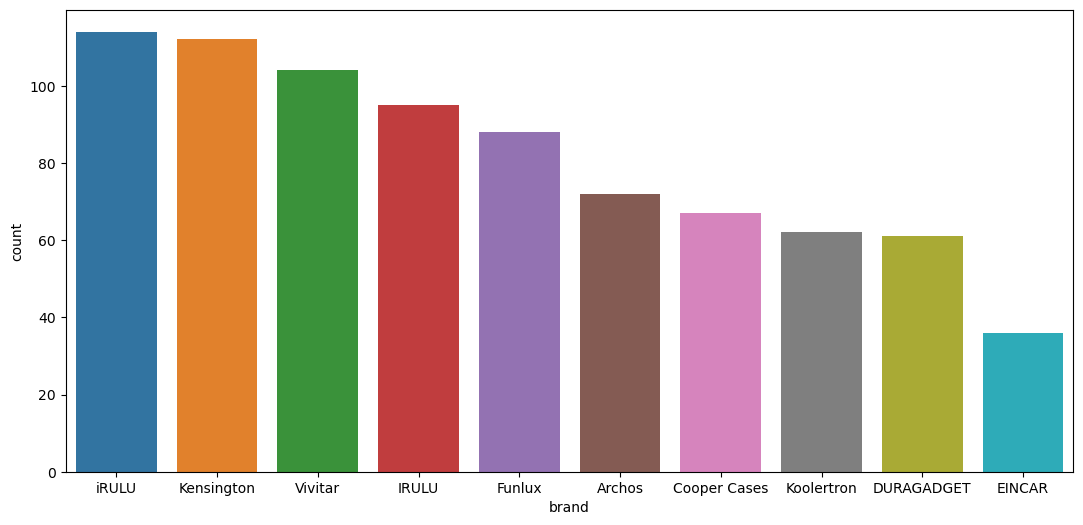

In [42]:
#brand that sold the least
plt.figure(figsize=(13, 6))
sns.countplot(x='brand',data=dataset,order=dataset['brand'].value_counts().iloc[-10:].index)

we can see that the brand nameof eincar sold the least 

logitech and bose had the most sales 

<Axes: xlabel='brand', ylabel='count'>

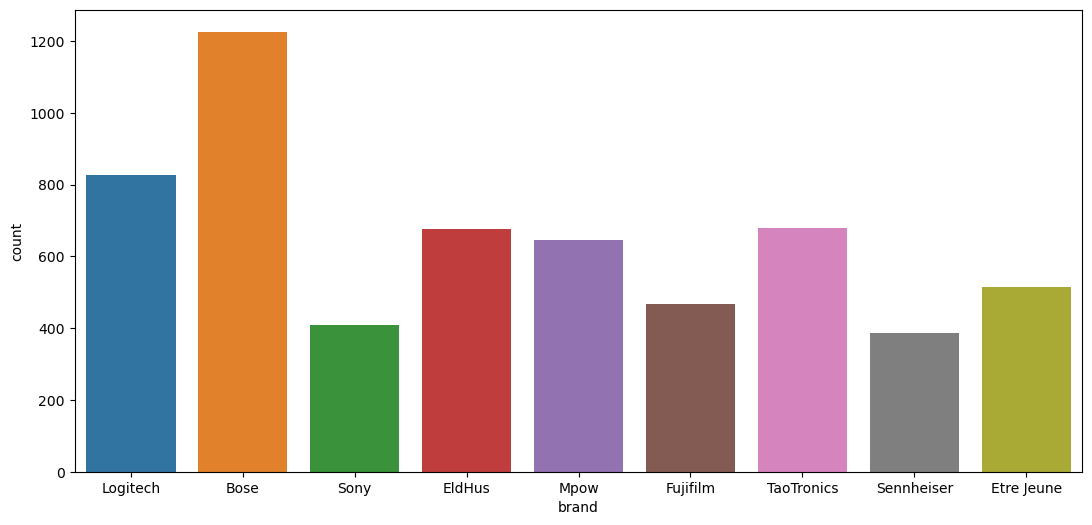

In [49]:
#brands with the most sales in 2016
plt.figure(figsize=(13, 6))
sns.countplot(x='brand',data=dataset[dataset['year']==2016],order=dataset['brand'].value_counts().iloc[1:10].index)

in 2016 bose overtook logitech to hae the most sales

tootroncs had the third most saes that year

<Axes: xlabel='brand', ylabel='count'>

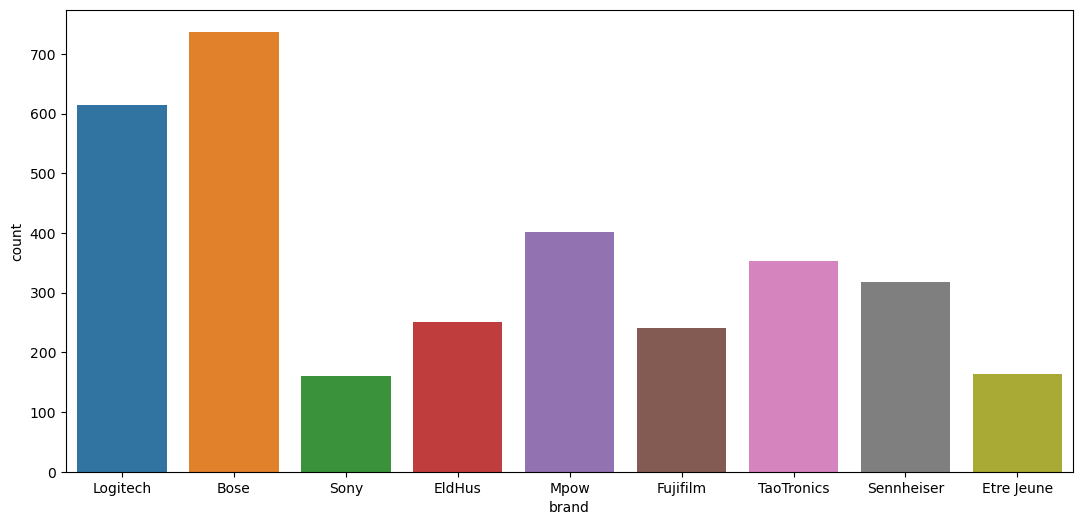

In [55]:
#brands with most sales in 2017
plt.figure(figsize=(13,6))
sns.countplot(x='brand',data=dataset[dataset['year']==2017],order=dataset['brand'].value_counts().iloc[1:10].index)

the top 3 products sold in 2017 were Bose,Logitech and mpow

<Axes: xlabel='brand', ylabel='count'>

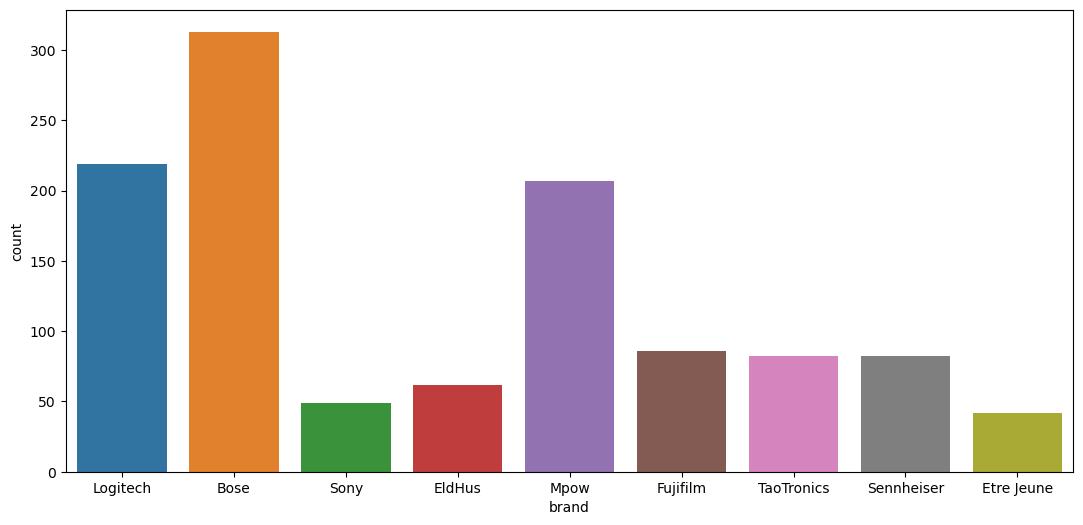

In [59]:
#brand with most sales in 2018
plt.figure(figsize=(13,6))
sns.countplot(x='brand',data=dataset[dataset['year'] == 2018],order=dataset['brand'].value_counts().iloc[1:10].index)

for 2018, Bose was the most sold for a third year in a row followed by logitech while Mpo was the third most sold.

<Axes: xlabel='month', ylabel='count'>

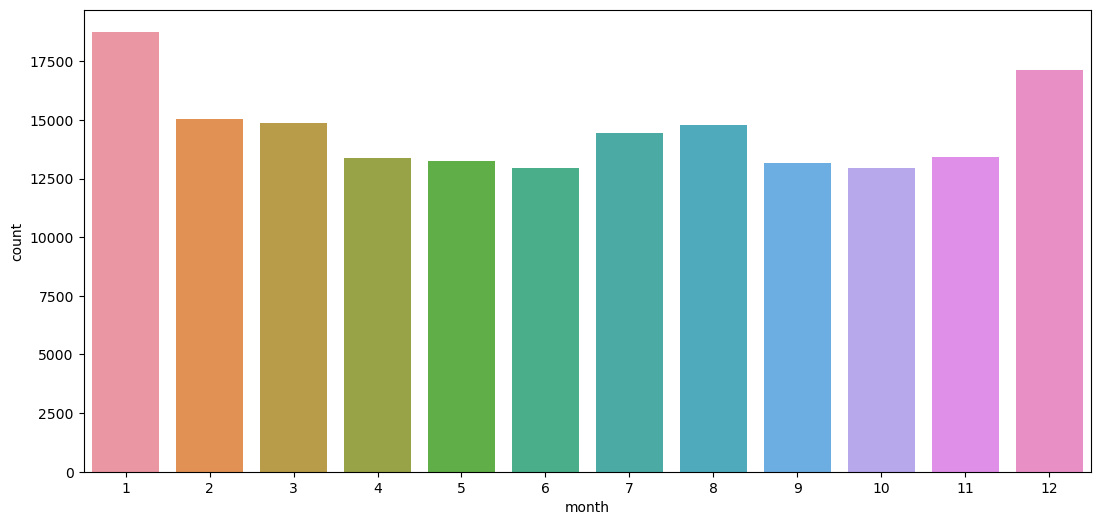

In [61]:
#month with most sales
plt.figure(figsize=(13,6))
sns.countplot(x='month',data=dataset)

January was the month with most sales

<Axes: xlabel='category', ylabel='count'>

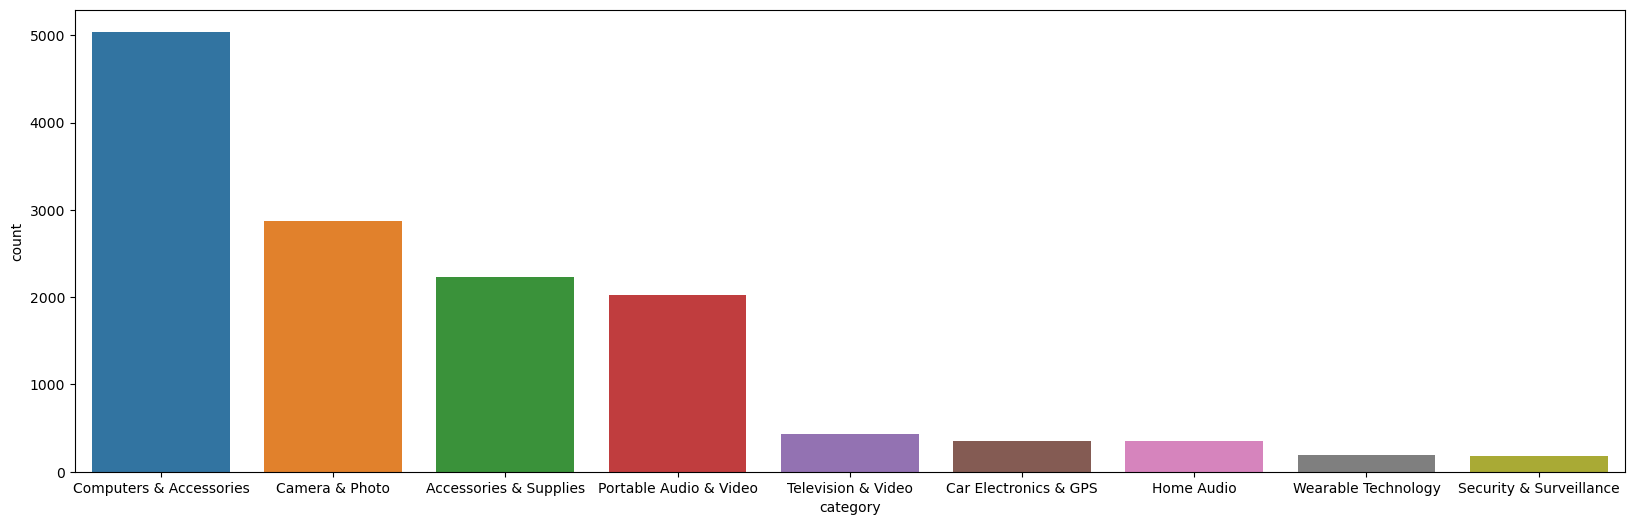

In [66]:
#product  that sold most in january by category
plt.figure(figsize=(20,6))
sns.countplot(x='category',data=dataset[dataset['month']== 1],order=dataset['category'].value_counts().iloc[1:10].index)

The top 3 products sold in january were computer and accesore,CAmera and Photo and Accesories and Supplies.

<Axes: xlabel='category', ylabel='count'>

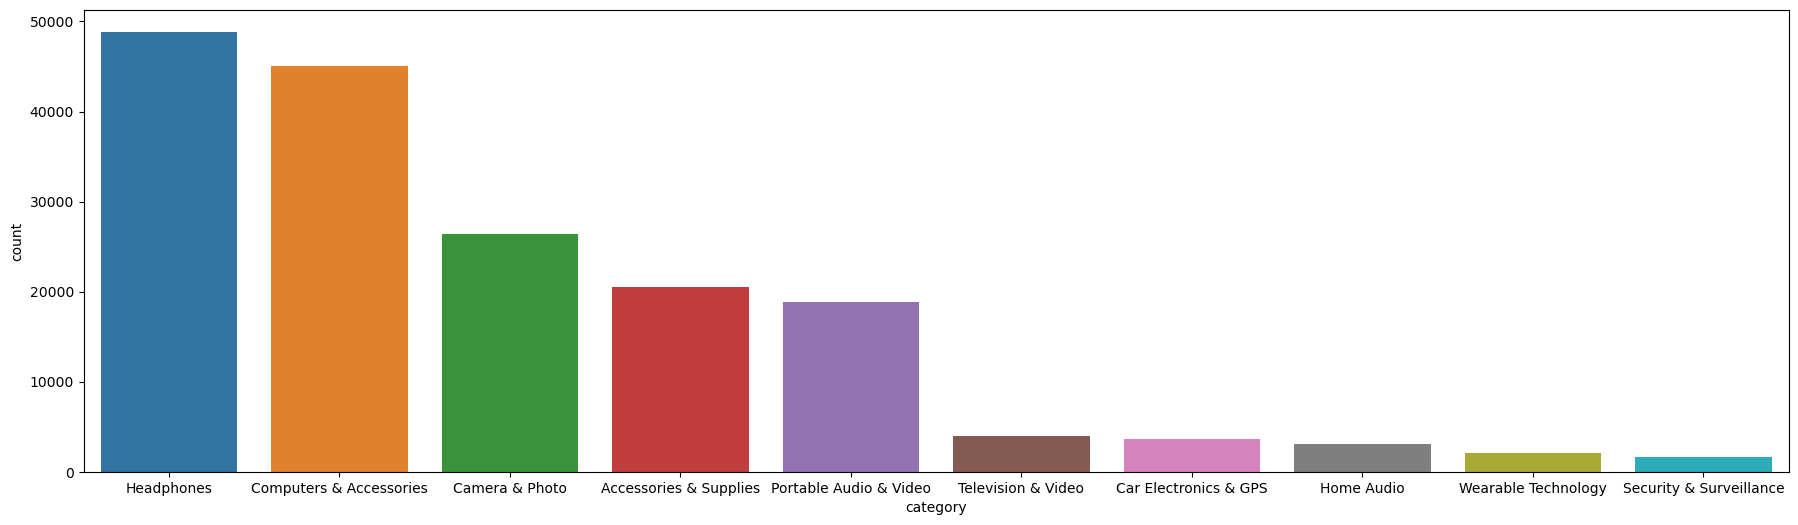

In [73]:
#category with least sale
plt.figure(figsize=(22,6))
sns.countplot(x='category',data=dataset,order=dataset['category'].value_counts().iloc[-10:].index)

The category with least sales was scurity and survliance while the most sales were headPhone.

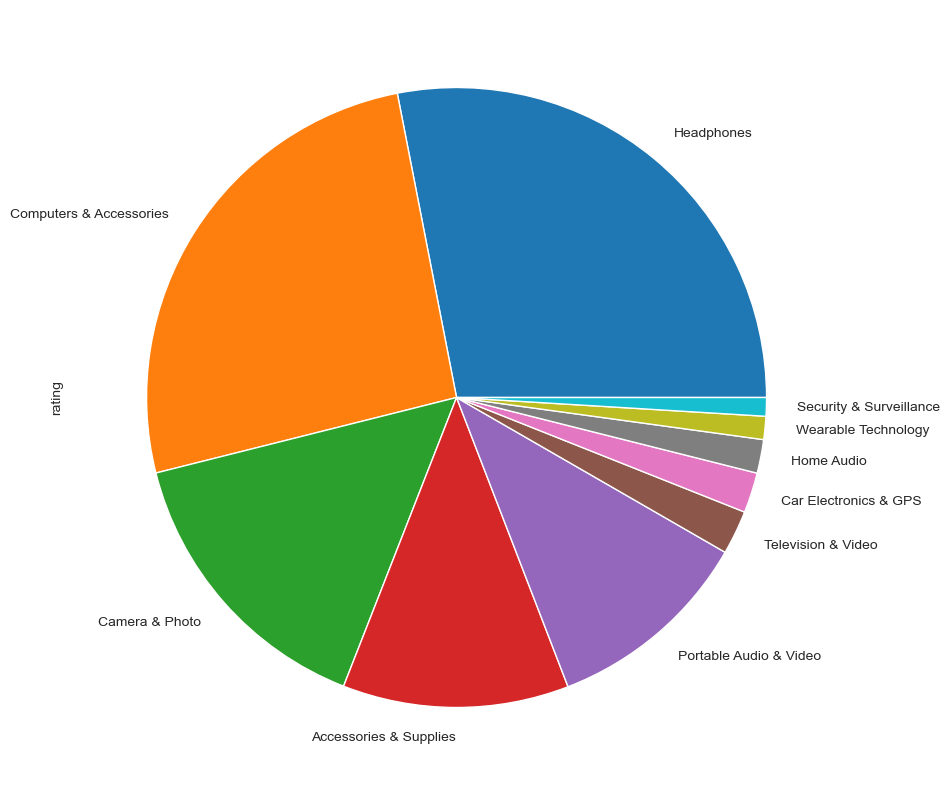

In [80]:
#distribuion of sales presented in a pie chart
plt.figure(figsize=(10,15))
dataset['category'].value_counts(normalize=True)
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')

sns.set_style('white')

Conlusion of our analysis:

1.We can see that the year 2015 ha the best sales

2.The month of january had the best sales

3.We can see that the brand Bose and Logitch sold the most

4.We can se that the category of headphones sold the most.

5.We can se that the brand name of Eincar sold the least followed closely with DURAGADGET.

6.We ca see that the category of security and surveliance sold the least.